In [58]:
import numpy as np
from PIL import Image

In [148]:
class fcm():
    def __init__(self, input, k_clusters , m):
        self.input=input
        
        self.k=k_clusters 
        self.m=m
        self.matrix_u=np.random.rand(self.input.shape[0], self.k)
        self.d=self.input.shape[1]
    def centroid(self):
        C=[]
        
        for i in range(self.k):
            ws=np.power(self.matrix_u[:,i],self.m).sum()
            Cj = []

            for x in range(self.d):
                num=(self.input[:,x] * np.power([self.matrix_u[:,i]],self.m)).sum()
                c_val=num/ws
                Cj.append(c_val)
            C.append(Cj)
        return np.array(C)
    
    def U_update(self, C):
         
        
        dist_matrix = np.zeros((self.input.shape[0], self.k))
        for i in range(self.k):
            dist_matrix[:, i] = np.linalg.norm(self.input - C[i], axis=1)
        
    
        dist_matrix[dist_matrix == 0] = 1e-8
        
        
        for j in range(self.k):
            num = dist_matrix[:, j]
            denom = np.sum((num[:, None] / dist_matrix) ** (2 / (self.m - 1)), axis=1)
            self.matrix_u[:, j] = 1 / denom

        
        
        return self.matrix_u
image = Image.open("milky-way.jpg")
mg_array = np.array(image)
mg_array_flat = mg_array.reshape(-1, mg_array.shape[2])
mg_array_flat.shape
FCM=fcm(mg_array_flat, 4, 2)
        





        


    

In [159]:
for i in range (200):
    
    c=FCM.centroid()
    
    U= FCM.U_update(c)

In [60]:
def computeCentroids(X, U, m, k):
    C = []
    d = X.shape[1]  
    for i in range(k):
        weight_sum = np.power(U[:, i], m).sum()
        Cj = []
        for x in range(d):
            numerator = (X[:,x] * np.power(U[:, i], m)).sum()
            c_val = numerator / weight_sum
            Cj.append(c_val)
        C.append(Cj)
    return np.array(C)

In [61]:
def U_update(X, U, C, k, m):
    X_size = X.shape[0]  
    
    # Precompute the distance matrix between all points and all centroids
    dist_matrix = np.zeros((X_size, k))
    for i in range(k):
        dist_matrix[:, i] = np.linalg.norm(X - C[i], axis=1)
    
   
    dist_matrix[dist_matrix == 0] = 1e-8
    
    # Update the U matrix
    for j in range(k):
        num = dist_matrix[:, j]
        denom = np.sum((num[:, None] / dist_matrix) ** (2 / (m - 1)), axis=1)
        U[:, j] = 1 / denom

    # Normalize U so that the sum across all memberships for a point is 1
    # U /= U.sum(axis=1, keepdims=True)
    
    return U

In [160]:
U.shape

(1048576, 4)

In [161]:



max_index=np.argmax(U, axis=1)
rg = np.array([[255, 255, 255],  # Green for Cluster 0
                   [0, 0, 0],
                   [0,255,124],
                   [0,100,45]])
colored_pixels = rg[max_index]
segmented_image = colored_pixels.reshape(mg_array.shape).astype(np.uint8)


In [162]:
segmented_image_pil = Image.fromarray(segmented_image)

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

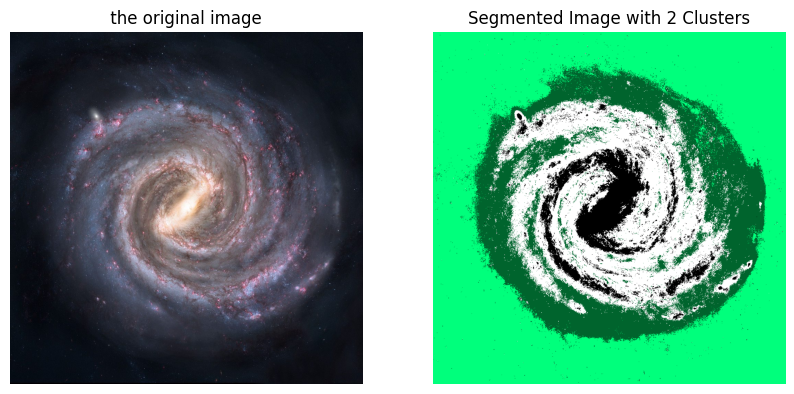

In [163]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)

plt.imshow(image)
plt.title(" the original image ")
plt.axis("off")
plt.subplot(1,2,2)


plt.imshow(segmented_image_pil)
plt.title(f"Segmented Image with {2} Clusters")
plt.axis("off")